## Exploratory Data Analysis

We used this notebook to get familiar with the datasets we have. There is more than 10 questions we need to answer during the EDA.

Also see Exploratory Data Analysis 2 to see the change when using log function to more closely represent normal distribution.


In [5]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [400]:
# import dataset
df = pd.read_csv('../data/flights_samp.csv')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [401]:
df.arr_delay

0      -35.0
1       -5.0
2      -28.0
3       -9.0
4       22.0
        ... 
4995     0.0
4996    -6.0
4997   -10.0
4998   -29.0
4999     6.0
Name: arr_delay, Length: 5000, dtype: float64

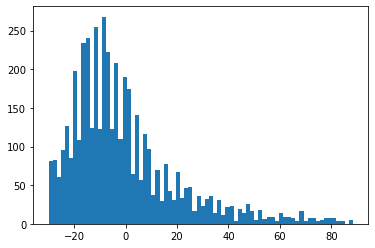

In [402]:
plt.hist(df.arr_delay, bins=np.arange(-30,90, 1.6));

The target skews to the right, this is also represented by its mean and median differences.  

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
# We've chosen to take a more narrow sample to closely represent what model will be testing (first week of January, and 5 days on either side - not including Dec 25)
# However, the day of week/ holiday phenomenon would be interesting to look at
def add_weekday(df):
    """ creates boolean column to indicate day of week 
        https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.weekday.html
        week starts 0 with monday) """

    df['weekday'] = df['fl_date'].astype('datetime64[ns]')

    f = lambda x: x.weekday()     
    df['weekday'] = df['weekday'].apply(f).astype('int32')
    return df

add_weekday(df)

,index,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,log_arr_delay,weekday
0,244649,2019-01-07,AA,AA,AA,362,AA,N161AA,362,12892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,190528,2019-01-04,UA,UA_CODESHARE,UA,3788,ZW,N437AW,3788,13930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,50595,2018-12-29,WN,WN,WN,5741,WN,N7738A,5741,13871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,116214,2019-01-01,WN,WN,WN,1641,WN,N423WN,1641,15304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,134474,2019-01-02,UA,UA_CODESHARE,UA,4233,EV,N14558,4233,11618,...,0.0,22.0,0.0,0.0,NaN,NaN,NaN,NaN,3.091042,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,118168,2019-01-01,DL,DL,DL,2173,DL,N535US,2173,12892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,1
4996,306574,2019-01-10,G4,G4,G4,1608,G4,253NV,1608,14082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4997,303601,2019-01-10,DL,DL_CODESHARE,DL,3289,9E,N294PQ,3289,11003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4998,346537,2019-01-12,AA,AA,AA,2809,AA,N338RS,2809,12953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# CALCULATE MEAN FLIGHT DELAY PER DAY OF WEEK
weekday_mean = df[['weekday', 'arr_delay']]
weekday_mean = weekday_mean.groupby(['weekday'], as_index=False).mean()
weekday_mean=weekday_mean.rename(columns={'arr_delay': 'avg_arr_delay'})
weekday_mean=weekday_mean.replace({0: 'M', 1:'Tu',2:'W',3:'Th',4:'F',5:'Sa',6:'Su'})
weekday_mean

,weekday,avg_arr_delay
0,M,NaN
1,Tu,NaN
2,W,NaN
3,Th,NaN
4,F,NaN
5,Sa,NaN
6,Su,NaN


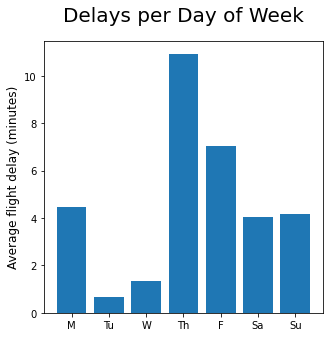

In [46]:
# PLOT WEEKDAY AVG DELAY

x = weekday_mean.weekday
y = weekday_mean.avg_arr_delay

fig, ax = plt.subplots( figsize = (5,5))

ax.bar(x,y)
ax.set_ylabel('Average flight delay (minutes)', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_title('Delays per Day of Week', fontsize=20, y=1.05)

plt.show()

In [47]:
# CALCULATE MEDIAN FLIGHT DELAY PER DAY OF WEEK
weekday_med = df[['weekday', 'arr_delay']]
weekday_med = weekday_med.groupby(['weekday'], as_index=False).median()
weekday_med=weekday_med.rename(columns={'arr_delay': 'median_arr_delay'})
weekday_med=weekday_med.replace({0: 'M', 1:'Tu',2:'W',3:'Th',4:'F',5:'Sa',6:'Su'})
weekday_med

,weekday,median_arr_delay
0,M,-6.0
1,Tu,-8.0
2,W,-5.0
3,Th,-5.0
4,F,-5.0
5,Sa,-7.0
6,Su,-4.0


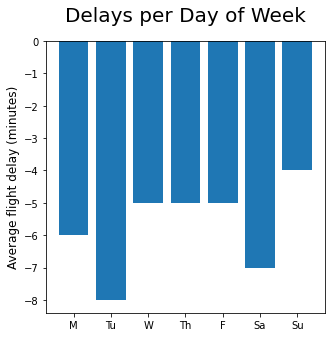

In [48]:
# PLOT WEEKDAY MEDIAN DELAY

x = weekday_med.weekday
y = weekday_med.median_arr_delay

fig, ax = plt.subplots( figsize = (5,5))

ax.bar(x,y)
ax.set_ylabel('Average flight delay (minutes)', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_title('Delays per Day of Week', fontsize=20, y=1.05)

plt.show()

Interesting - Looks Like theres different factors comming into play here - will plot together... must be a number of outliers affecting the mean.  There is definitely a difference in day of week, but can't use hypotheisis that weekends are different than weekdays.

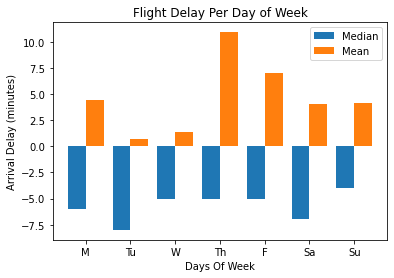

In [50]:
# PLOT BOTH MEASURES OF MIDDLE TOGETHER

X = weekday_mean.weekday
y_med = weekday_med.median_arr_delay
y_mean = weekday_mean.avg_arr_delay

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y_med, 0.4, label = 'Median')
plt.bar(X_axis + 0.2, y_mean, 0.4, label = 'Mean')
  
plt.xticks(X_axis, X)
plt.xlabel("Days Of Week")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Flight Delay Per Day of Week")
plt.legend()
plt.show()

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [403]:
# We evaluate this in the exploratory analysis2 and in the feature engineering parts

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [407]:
# SPLIT OUT TIME TO HOUR OF DAY
def split_time_of_day_departure(df):
    """ takes estimated time of departure and splits in to hours 24 hour clock (local time) """
    df['dep_hour'] = df['crs_dep_time']
    df['dep_hour'] = np.floor(df['dep_hour']/100).astype("int")
    return df
df = split_time_of_day_departure(df)

def split_time_of_day_arrival(df):
    """ takes estimated time of arrival and splits in to hours 24 hour clock (local time) """
    df['arr_hour'] = df['crs_arr_time']
    df['arr_hour'] = np.floor(df['arr_hour']/100).astype("int")
    return df
df = split_time_of_day_arrival(df)


In [408]:
# DEPARTURE TAXI OUT
df_taxi_out = df[['origin', 'taxi_in','dep_hour', 'dest', 'taxi_out', 'arr_hour']]
df_taxi_out = df_taxi[['origin','dep_hour','taxi_out']].groupby(['origin','dep_hour'], as_index=False).mean().sort_values(['origin','dep_hour'], ascending = True)

# # OF FLIGHTS PER HOUR - (both in and out)
df_flights = df[['origin', 'origin_city_name','dep_hour', 'dest', 'arr_hour']]
df_flights = df_flights[['origin','dep_hour','origin_city_name']].groupby(['origin','dep_hour'], as_index=False).count().sort_values(['origin','dep_hour'], ascending = True)
# df_flights

KeyError: "None of [Index(['origin', 'dep_hour', 'taxi_out'], dtype='object')] are in the [columns]"

In [409]:
# plot #flights/ hour against avg flight per hour fora few top airports 

# FOR ORD
df_taxi_ord = df_taxi_out[df_taxi['origin'] == 'ORD']
df_flights_ord = df_flights[df_flights['origin'] == 'ORD']

X = df_taxi_ord.dep_hour
y1 = df_flights_ord.origin_city_name  # this is now actually the count should rename
y2 = df_taxi_ord.taxi_out # this is tge average should rename '

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '# flights')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'avg taxi out')
  
plt.xticks(X_axis, X)
plt.xlabel("Hour of Day")
plt.ylabel("Flights/Minutes")
plt.title("# Flights and Taxi out Time (ORD)")
plt.legend()
plt.show()

KeyError: 'origin'

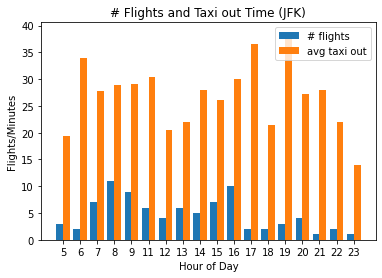

In [228]:
# FOR JFK

df_taxi_jfk = df_taxi[df_taxi_out['origin'] == 'JFK']
df_flights_jfk = df_flights[df_flights['origin'] == 'JFK']

X = df_taxi_jfk.dep_hour
y1 = df_flights_jfk.origin_city_name  # this is now actually the count should rename
y2 = df_taxi_jfk.taxi_out # this is tge average should rename '

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '# flights')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'avg taxi out')
  
plt.xticks(X_axis, X)
plt.xlabel("Hour of Day")
plt.ylabel("Flights/Minutes")
plt.title("# Flights and Taxi out Time (JFK)")
plt.legend()
plt.show()

In [262]:
# ARRIVAL TAXI IN
df_taxi_in= df[['taxi_in', 'dest', 'arr_hour']]
df_taxi_in = df_taxi_in[['dest','arr_hour','taxi_in']].groupby(['dest','arr_hour'], as_index=False).mean().sort_values(['dest','arr_hour'], ascending = True)

# # # OF FLIGHTS PER HOUR - (both in and out)
df_flights_in= df[['taxi_in', 'dest', 'arr_hour']]
df_flights_in = df_flights_in[['dest','arr_hour','taxi_in']].groupby(['dest','arr_hour'], as_index=False).count().sort_values(['dest','arr_hour'], ascending = True)
df_flights_in = df_flights_in.rename(columns={'taxi_in': "num_flights"})


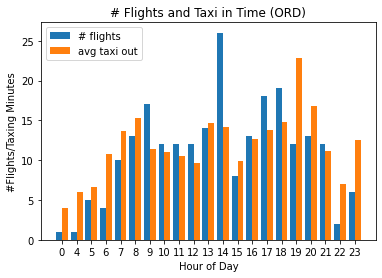

In [263]:
# plot #flights/ hour against avg flight per hour for a few top airports 

# FOR ORD
df_taxi_ord = df_taxi_in[df_taxi_in['dest'] == 'ORD']
df_flights_ord = df_flights_in[df_flights_in['dest'] == 'ORD']

X = df_taxi_ord.arr_hour
y1 = df_flights_ord.num_flights  # this is now actually the count should rename
y2 = df_taxi_ord.taxi_in # this is the average should rename '

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '# flights')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'avg taxi out')
  
plt.xticks(X_axis, X)
plt.xlabel("Hour of Day")
plt.ylabel("#Flights/Taxing Minutes")
plt.title("# Flights and Taxi in Time (ORD)")
plt.legend()
plt.show()

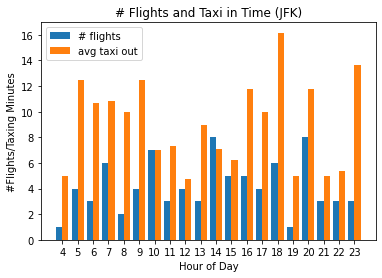

In [264]:
# FOR ORD
df_taxi_ord = df_taxi_in[df_taxi_in['dest'] == 'JFK']
df_flights_ord = df_flights_in[df_flights_in['dest'] == 'JFK']

X = df_taxi_ord.arr_hour
y1 = df_flights_ord.num_flights  # this is now actually the count should rename
y2 = df_taxi_ord.taxi_in # this is the average should rename '

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '# flights')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'avg taxi out')
  
plt.xticks(X_axis, X)
plt.xlabel("Hour of Day")
plt.ylabel("#Flights/Taxing Minutes")
plt.title("# Flights and Taxi in Time (JFK)")
plt.legend()
plt.show()

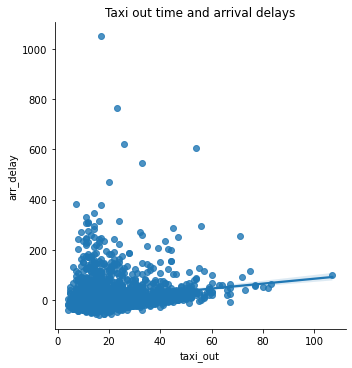

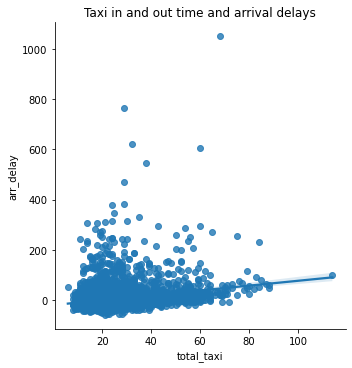

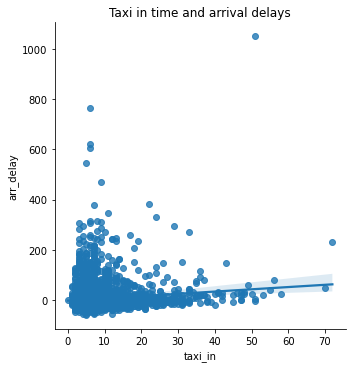

In [275]:
# NEED TO PLOT A FEW MORE?  OR TAKE AVERAGE OR MED ACROSS ALL AIRPORTS MINUS OUTLIERS

# Try taxi-time out vs delay
ax =sns.lmplot(x='taxi_out', y='arr_delay', data = df)
ax.set(title='Taxi out time and arrival delays')
plt.show()

df['total_taxi'] = df.taxi_in + df.taxi_out
ax =sns.lmplot(x='total_taxi', y='arr_delay', data = df)
ax.set(title='Taxi in and out time and arrival delays')
plt.show()

# df['total_taxi'] = df.taxi_in + df.taxi_out
ax =sns.lmplot(x='taxi_in', y='arr_delay', data = df)
ax.set(title='Taxi in time and arrival delays')
plt.show()

In [ ]:
# Maybe include/ attach avg or med taxi times with airports?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [411]:
# CALCULATE DIFF BETWEEN ACTUAL DEPARTURE AND SCHEDULED DEPARTURE AND RELATE TO TYPES OF DELAYS - 'dep_delay' column contains this

# delayed have positive delay values
total_delayed = df[df['arr_delay'] >0].copy()

# calculate percentage of departure delays from total delays
percentage_dep_delay = total_delayed[total_delayed['dep_delay'] > 0].count()/total_delayed['dep_delay'].count()
print(" Percentage of flights delayed before departure is {:.2%}".format(percentage_dep_delay['dep_time']))

 Percentage of flights delayed before departure is 73.64%


In [412]:
# Find diff of dep delay vs arr delay 

total_delayed['delay_diff'] = total_delayed.dep_delay - total_delayed.arr_delay # if this value is negative, then reduced delay in air
total_delayed['delay_diff'].mean()
total_delayed['delay_diff'].median()
print(f"Mean difference between departure delay and arrival delay is {total_delayed['delay_diff'].mean():.2} minutes and median is {total_delayed['delay_diff'].median()} minutes, but/since airlines are able to have negative values indicating they are able to make up time during flights" )

Mean difference between departure delay and arrival delay is -2.6 minutes and median is -2.0 minutes, but/since airlines are able to have negative values indicating they are able to make up time during flights


#### **Task 6**: How many states cover 50% of US air traffic? 

In [376]:
# SPLIT DATA INTO STATES AND CITIES
def split_dest_city_state(df):
    """ separates destination city and states into own columns"""
    df['dest_state'] = df['dest_city_name']
    df['dest_city'] = df['dest_city_name']
    
    f_state= lambda x: x.split(sep=', ')[1]
    f_city= lambda x: x.split(sep=', ')[0]

    df['dest_state'] = df['dest_state'].apply(f_state)
    df['dest_city'] = df['dest_city'].apply(f_city)
    return df

def split_origin_city_state(df):
    """ separates origin city and states into own columns"""
    df['origin_state'] = df['origin_city_name']
    df['origin_city'] = df['origin_city_name']
    
    f_state= lambda x: x.split(sep=', ')[1]
    f_city= lambda x: x.split(sep=', ')[0]

    df['origin_state'] = df['origin_state'].apply(f_state)
    df['origin_city'] = df['origin_city'].apply(f_city)
    return df

df = split_dest_city_state(df)
df = split_origin_city_state(df)

# CALCULATE FLIGHT COUNTS PER STATES
state_count_orig = df[['origin_state', 'index']].groupby('origin_state', as_index=False).count().sort_values(by='index')
state_count_dest = df[['dest_state', 'index']].groupby('dest_state', as_index=False).count().sort_values(by='index')
state_count= state_count_orig.merge(state_count_dest, left_on='origin_state', right_on='dest_state')

state_count['total_flights'] = state_count['index_x']+state_count['index_y']
state_count.rename(columns = {'origin_state': 'state'}, inplace=True)
state_count.drop(['index_x', 'dest_state', 'index_y'], axis=1, inplace=True)

state_count= state_count.sort_values(by='total_flights', ascending=False)

# CALULATE HOW MANY STATES ACCOUNT FOR 50% OF ALL TRAFFIC IN USA
state_list = list(state_count.state)
flight_count_list = list(state_count.total_flights)

total_flights = state_count.total_flights.sum()
total_flights

top_state=[]
flight_counts=0
i=0
while flight_counts < total_flights/2:
    top_state.append(state_list[i])

    flight_counts += flight_count_list[i]
    i+=1


print("Number of top trafficed states accounting for 50% of traffic: ", len(top_state))
top_state


Number of top trafficed states accounting for 50% of traffic:  8


['CA', 'TX', 'FL', 'IL', 'NY', 'GA', 'NC', 'CO']

#### get top 10 states for feature engineering

In [386]:
top10states = state_count.state.head(10)
keys = top10states 
values = range(10,0,-1)
data = dict(zip(keys, values))


In [387]:
data

{'CA': 10,
 'TX': 9,
 'FL': 8,
 'IL': 7,
 'NY': 6,
 'GA': 5,
 'NC': 4,
 'CO': 3,
 'PA': 2,
 'WA': 1}

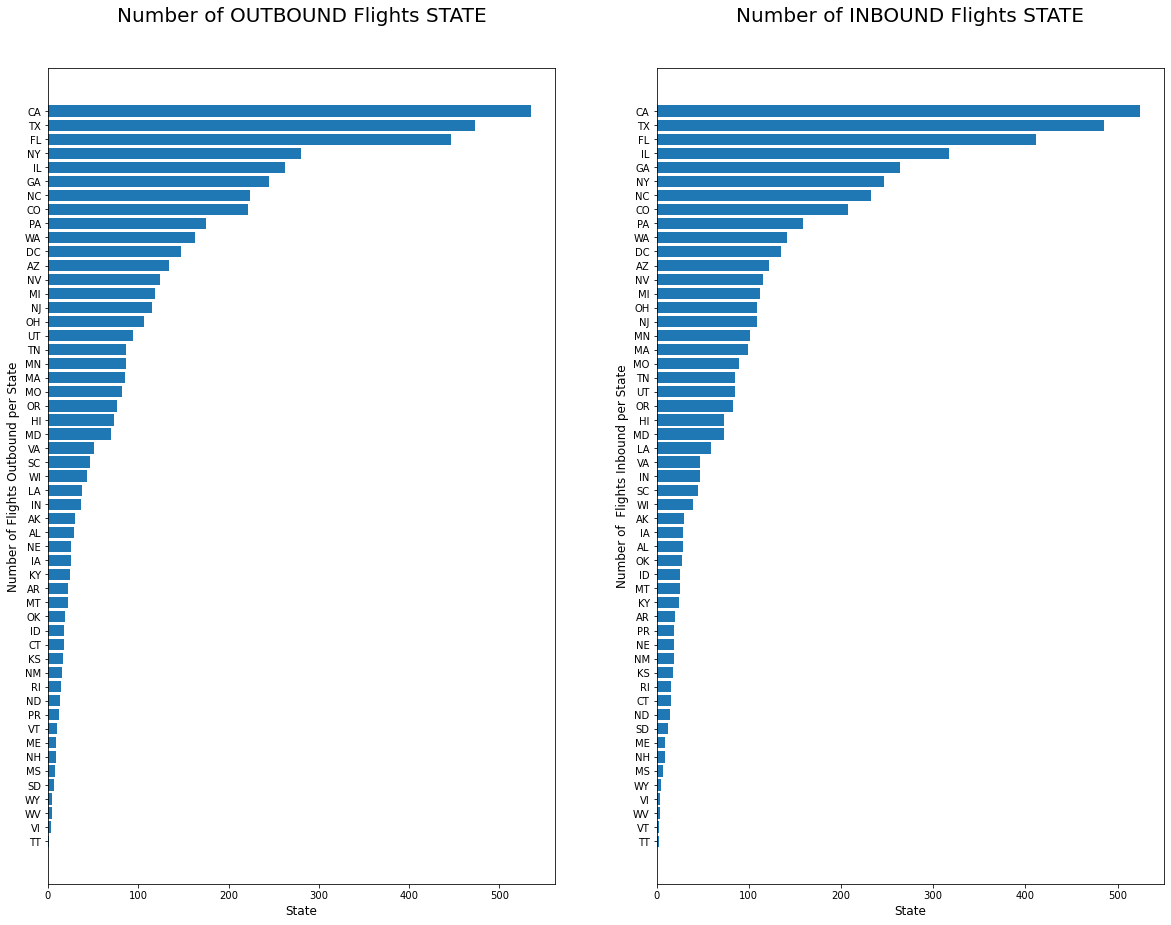

In [11]:
# PLOT NUMBER OF FLIGHTS PER STATE
# import matplotlib
import matplotlib.pyplot as plt

x1 = state_count_orig['origin_state']
x2 = state_count_dest['dest_state']

y1 = state_count_orig['index']
y2 = state_count_dest['index']

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (20,15))

ax1.barh(x1,y1)
ax1.set_ylabel('Number of Flights Outbound per State', fontsize=12)
ax1.set_xlabel('State', fontsize=12)
ax1.set_title('Number of OUTBOUND Flights STATE', fontsize=20, y=1.05)

ax2.barh(x2,y2)
ax2.set_ylabel('Number of  Flights Inbound per State', fontsize=12)
ax2.set_xlabel('State', fontsize=12)
ax2.set_title('Number of INBOUND Flights STATE', fontsize=20, y=1.05)
# add legend

plt.show()

# use quantile - qcut 4 try 4 or 10 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [413]:
# As seen in above question - aircraft are on average able to make up time in the air (aka go faster)

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [414]:
# CREATE HOUR OF DAY AND HAUL TYPE COLUMNS

def split_time_of_day_departure(df):
    """ takes estimated time of departure and splits in to hours 24 hour clock (local time) """
    df['dep_hour'] = df['crs_dep_time']
    df['dep_hour'] = np.floor(df['dep_hour']/100).astype("int")
    return df
  
def create_haul_type(df):
    """ adds short:0, mid:1, long:2 range haul types from crs_elapsed_time (scheduled) """

    df["haul_type"] = df['crs_elapsed_time']
    df["haul_type"].mask(df["haul_type"].values < 180, 0, inplace=True)
    df["haul_type"].mask((df["haul_type"] >= 180) & (df["haul_type"] < 360), 1, inplace=True)
    df["haul_type"].mask((df["haul_type"] >= 360), 2, inplace=True) 
    df["haul_type"]= df["haul_type"].astype('int')
    return df  

df = split_time_of_day_departure(df)
df = create_haul_type(df)
df.haul_type.unique()


array([1, 0, 2])

In [415]:
# want departure time for each category - SPLIT APART

df_haul_type = df[['haul_type', 'dep_hour', 'index']]
df_haul_type = df_haul_type.groupby(['dep_hour','haul_type'], as_index=False).count()

short_haul = df_haul_type[df_haul_type.haul_type == 0]
med_haul = df_haul_type[df_haul_type.haul_type == 1]
long_haul = df_haul_type[df_haul_type.haul_type == 2]

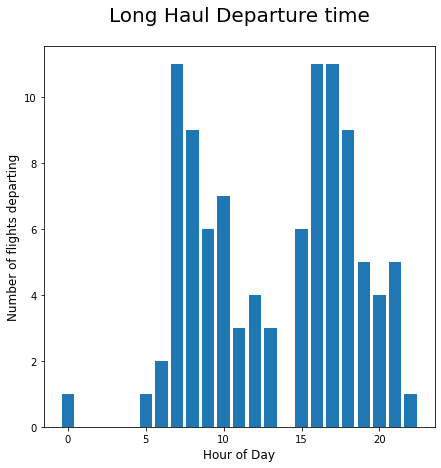

In [416]:
# PLOT EACH HAUL TYPE TO VISULIZE
import matplotlib.pyplot as plt
# Long Haul Plot

x = long_haul.dep_hour
y = long_haul['index']

fig, ax = plt.subplots( figsize = (7,7))

ax.bar(x,y)
ax.set_ylabel('Number of flights departing', fontsize=12)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_title('Long Haul Departure time', fontsize=20, y=1.05)

plt.show()

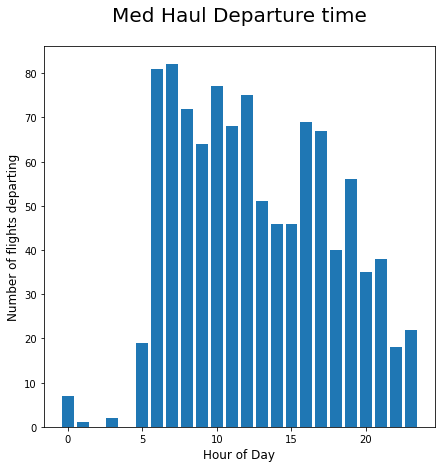

In [417]:
# Mid Haul Plot

x = med_haul.dep_hour
y = med_haul['index']

fig, ax = plt.subplots( figsize = (7,7))

ax.bar(x,y)
ax.set_ylabel('Number of flights departing', fontsize=12)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_title('Med Haul Departure time', fontsize=20, y=1.05)

plt.show()

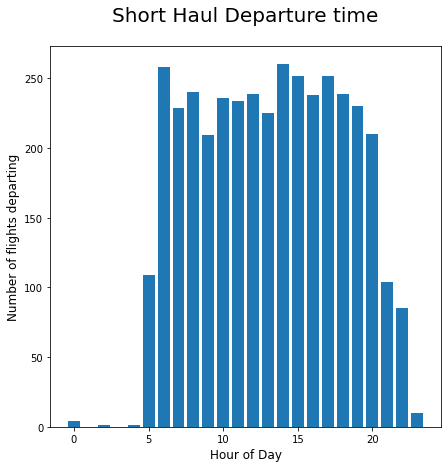

In [418]:
# short Haul Plot

x = short_haul.dep_hour
y = short_haul['index']

fig, ax = plt.subplots( figsize = (7,7))

ax.bar(x,y)
ax.set_ylabel('Number of flights departing', fontsize=12)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_title('Short Haul Departure time', fontsize=20, y=1.05)

plt.show()

Looks like short haul more uniformly distributed, med haul declines slowly throughout day
and long haul is binomially split - which all make sense intuitively.

In [ ]:
# SEE IF CORRELATION HAUL TYPE AND ARR DELAY

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [419]:
# CALCULATE FLIGHT COUNTS PER AIRPORTS
airport_count_orig = df[['origin', 'index']].groupby('origin', as_index=False).count().sort_values(by='index', ascending = False)
airport_count_dest = df[['dest', 'index']].groupby('dest', as_index=False).count().sort_values(by='index')
airport_count= airport_count_orig.merge(airport_count_dest, left_on='origin', right_on='dest')
airport_count
airport_count['total_flights'] = airport_count['index_x']+airport_count['index_y']
airport_count.rename(columns = {'origin': 'airport_code'}, inplace=True)
airport_count.drop(['index_x', 'dest', 'index_y'], axis=1, inplace=True)
airport_count.head()


,airport_code,total_flights
0,ATL,472
1,ORD,448
2,DEN,351
3,DFW,372
4,CLT,314


In [314]:
# CALULATE TOP 10 AIRPORTS FLIGHTS
top_airport_counts = airport_count.sort_values(by='total_flights', ascending=False).head(10)
top_airport_counts

,airport_code,total_flights
0,ATL,467
1,ORD,439
3,DFW,355
2,DEN,345
4,CLT,309
5,LAX,280
6,SEA,249
7,IAH,233
8,PHX,216
14,LGA,214


In [393]:
# GET AIRPORTS FOR ML
keys = top_airport_counts.air 
values = range(10,0,-1)
data = dict(zip(keys, values))
data

{'airport_code': 10, 'total_flights': 9}

In [315]:
# CALCULATE TRAFFIC THESE 10 AIRPORTS ACCOUNT FOR:

percent_traffic = top_airport_counts.total_flights.sum()/airport_count.total_flights.sum()
percent_traffic

print(f''' The top 10 airports account for {percent_traffic:.2%} of the flight traffic from {airport_count.airport_code.count()} airports.''')

 The top 10 airports account for 31.77% of the flight traffic from 244 airports.


In [394]:
def column_count(df, col_name):
    df.col_name
    
def make_bin_column(df, col_name, n_bin_range):
    '''
    Convert a numeric column to a categorical ordinal column.
    Assumption: the column that is going to be binned
    must be positive numeric numbers
    input:
      - df: data frame
      - col_name: column in string
      - n_bin_range: number of bin required
    return: a data frame with the newly binned column  
    '''
    # make bins and bin labels
    bin_ranges = np.linspace(0, df[col_name].max(), n_bin_range+1)
    bin_names = range(1, n_bin_range+1)
    
    # perform the binning
    new_col_name = col_name + '_bin'
    df[new_col_name] = pd.cut(np.array(df[col_name]), 
                              bins=bin_ranges, 
                              labels=bin_names)
    return df

In [395]:
airport_count = make_bin_column(airport_count, 'total_flights', 5)

In [396]:
airport_count.head()

,airport_code,total_flights,total_flights_bin
0,ATL,467,5
1,ORD,439,5
2,DEN,345,4
3,DFW,355,4
4,CLT,309,4


In [69]:
# ADD FLIGHT NUMBER BINS TO DF (changed to use airport_code rather than id)

# # merge the encoding with origin airport
merge_airport_count = airport_count.copy()
merge_airport_count.rename(columns={'airport_code': 'origin'}, inplace=True)
merge_airport_count.rename(columns={'total_flights_bin': 'origin_total_flights_bin'}, inplace=True)
df = df.merge(merge_airport_count, on='origin')
df.drop(columns='total_flights', axis=1, inplace=True)

# merge the encoding with destination airport
merge_airport_count.rename(columns={'origin': 'dest'}, inplace=True)
merge_airport_count.rename(columns={'origin_total_flights_bin': 'dest_total_flights_bin'}, inplace=True)
df = df.merge(merge_airport_count, on='dest')
df.drop(columns='total_flights', axis=1, inplace=True)


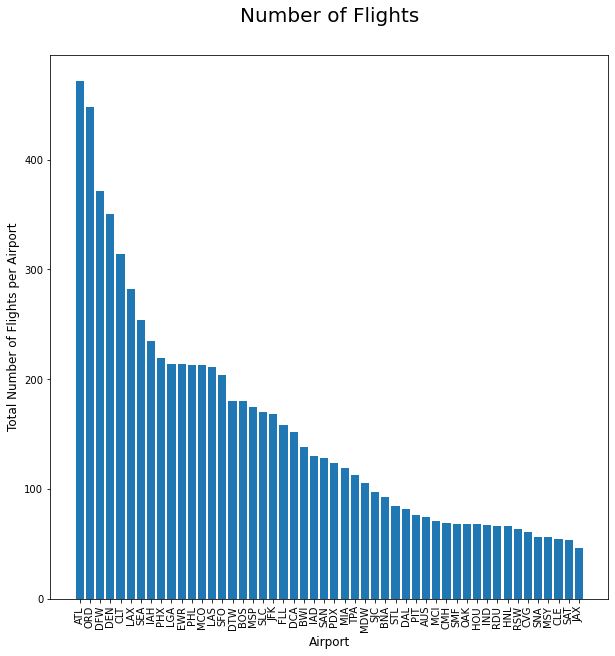

In [51]:
# PLOT AIRPORT FLIGHT VOLUME

import matplotlib.pyplot as plt

x = top_airport_counts.airport_code

y = top_airport_counts.total_flights

fig, ax = plt.subplots( figsize = (10,10))

ax.bar(x,y)
ax.set_ylabel('Total Number of Flights per Airport', fontsize=12)
ax.set_xlabel('Airport', fontsize=12)
ax.set_title('Number of Flights', fontsize=20, y=1.05)
plt.xticks(rotation=90)
plt.show()

# Can split into 6 teirs as well or qcut

### Extra Task - see impact of airport size and delay

In [ ]:
# ADD Number of flights TO DF (for plotting below)

# # merge the encoding with origin airport
merge_airport_count = airport_count.copy()
merge_airport_count.rename(columns={'airport_code': 'origin'}, inplace=True)
merge_airport_count.rename(columns={'total_flights_bin': 'origin_total_flights_bin', 'total_flights': 'origin_total_flights'}, inplace=True)
df = df.merge(merge_airport_count, on='origin')
# df.drop(columns='total_flights', axis=1, inplace=True)

# merge the encoding with destination airport
merge_airport_count.rename(columns={'origin': 'dest'}, inplace=True)
merge_airport_count.rename(columns={'origin_total_flights_bin': 'dest_total_flights_bin', 'origin_total_flights': 'dest_total_flights'}, inplace=True)
df = df.merge(merge_airport_count, on='dest')
# df.drop(columns='total_flights', axis=1, inplace=True)

# NEED TO DROP COLUMNS!!!

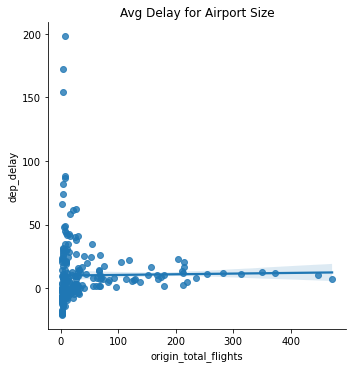

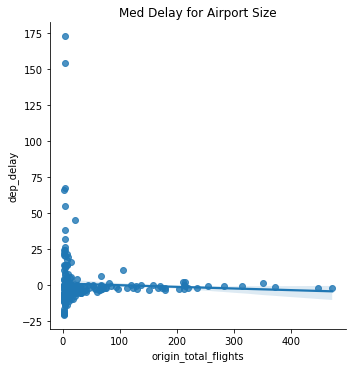

In [141]:
# PLOT DEPARTURE DELAYS BASED ON SIZE OF ORIGIN AIRPORT

delays_origin =df[['origin','dep_delay','origin_total_flights']]
delays_origin_mean = delays_origin.groupby('origin', as_index=False).mean()
delays_origin_median = delays_origin.groupby('origin', as_index=False).median()

ax =sns.lmplot(x='origin_total_flights', y='dep_delay', data = delays_origin_mean)
ax.set(title='Avg Delay for Airport Size')
plt.show()

ax =sns.lmplot(x='origin_total_flights', y='dep_delay', data = delays_origin_median)
ax.set(title='Med Delay for Airport Size')
plt.show()

# NOTE THE FOLLOWING ARE JUST SHOWING LAW OF LARGE NUMBERS - WILL NEED TO COME BACK TO THIS WITH DIFFERENT METRIC

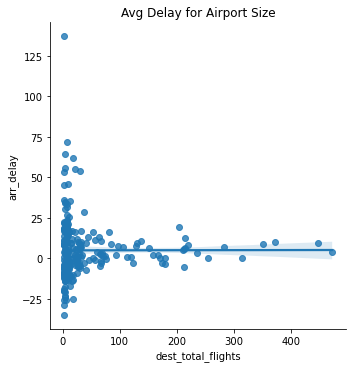

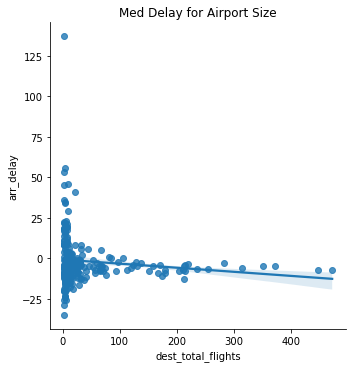

In [142]:
# PLOT ARRIVAL DELAYS BASED ON SIZE OF DESTINATION AIRPORT

delays_dest =df[['dest','arr_delay', 'dest_total_flights']]
delays_dest_mean = delays_dest.groupby('dest', as_index=False).mean()
delays_dest_median = delays_dest.groupby('dest', as_index=False).median()

ax =sns.lmplot(x='dest_total_flights', y='arr_delay', data = delays_dest_mean)
ax.set(title='Avg Delay for Airport Size')
plt.show()

ax =sns.lmplot(x='dest_total_flights', y='arr_delay', data = delays_dest_median)
ax.set(title='Med Delay for Airport Size')
plt.show()

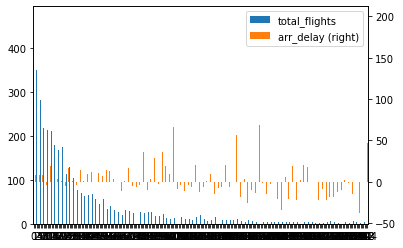

In [144]:
# Plot airport size (flights and arrival delay)

# average
plot_airpot_delays = df[['origin', 'arr_delay']]
 
plot_airpot_delays =plot_airpot_delays.groupby(['origin'], as_index=False).mean()
plot_airpot_delays =  airport_count.merge(plot_airpot_delays, right_on='origin', left_on='airport_code')
plot_airpot_delays = plot_airpot_delays.rename({'arr_delay': 'avg_arr_delay'})

# plot
plot_x=plot_airpot_delays[['airport_code','total_flights','arr_delay']]

plot_x.plot( kind= 'bar' , secondary_y= 'arr_delay' , rot= 0 )
plt.show()

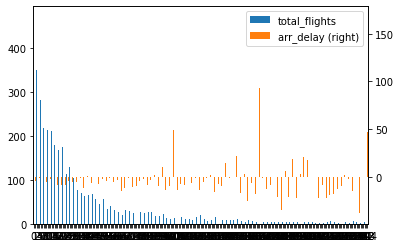

In [146]:
# median
plot_airpot_delays = df[['origin', 'arr_delay']]
 
plot_airpot_delays =plot_airpot_delays.groupby(['origin'], as_index=False).median()
plot_airpot_delays =  airport_count.merge(plot_airpot_delays, right_on='origin', left_on='airport_code')
plot_airpot_delays = plot_airpot_delays.rename({'arr_delay': 'median_arr_delay'})

# plot
plot_x=plot_airpot_delays[['airport_code','total_flights','arr_delay']]

plot_x.plot( kind= 'bar' , secondary_y= 'arr_delay' , rot= 0 )
plt.show()

# This makes sense - law of large numbers

### Passengers for airports

In [272]:
# Load in data set for passengers - monthly so take from January
passengers = pd.read_csv('../data/passengers_january.csv')

In [307]:
# NOTE THIS IS NOT DIRECTLY RELATED TO NUMBER OF FLIGHTS AS THIS IS FOR JAN MONTH AND FLIGHTS FOR 1ST WEEK JAN AND 5 DAYS SURROUNDING

# FLIGHTS OUT
passengers[['origin', 'passengers', 'aircraft_type', 'dest']]
passenger_count_out = passengers[['origin', 'passengers']].groupby('origin', as_index = False).count().sort_values("passengers", ascending = False)
passenger_count_out = passenger_count_out.rename(columns={'passengers':'outbound_passengers'})

# FLIGHTS IN
passengers[['origin', 'passengers', 'aircraft_type', 'dest']]
passenger_count_in = passengers[['dest', 'passengers']].groupby('dest', as_index = False).count().sort_values("passengers", ascending = False)
passenger_count_in = passenger_count_in.rename(columns={'passengers':'inbound_passengers'})
passenger_count_in

,dest,inbound_passengers
833,ORD,2643
77,ATL,2105
293,DEN,1910
635,LAX,1821
517,IAH,1548
...,...,...
478,HKD,1
1096,SYA,1
476,HIO,1
475,HIK,1


In [420]:
airport_count_pass = airport_count.merge(passenger_count_in, left_on='airport_code', right_on='dest', how = 'left')
airport_count_pass = airport_count_pass.merge(passenger_count_out, left_on='airport_code', right_on='origin', how = 'left')
airport_count_pass = airport_count_pass[['airport_code','total_flights','total_flights_bin', 'inbound_passengers','outbound_passengers']]

# NOTE: only doing outbound passengers for now as most delays happen before leaving (and inbound/ outbound similar)- look into this more after
# airport_count_pass['passenger_total_flight_ratio'] = airport_count_pass.outbound_passengers / airport_count_pass.total_flights
airport_count_pass.head(20)

# INTERESTING - SEEMS RANKING FOR AIRPORTS NETORIOUSLY BAD FOR DELAYS HAVE Higher passenger number ranking than
# flights ranking - also some of these are hubs - would like to include some of this information 

KeyError: "['total_flights_bin'] not in index"

In [352]:
delays_pass = delays_dest.groupby('dest', as_index = False).mean()

airport_count_pass_delay =  airport_count_pass.merge(delays_pass, left_on='airport_code', right_on='dest', how = 'left')
airport_count_pass_delay.sort_values("dest_total_flights", ascending = False).head(50)
airport_count_pass_delay['passenger_destTotalFlight_ratio'] = airport_count_pass_delay.outbound_passengers / airport_count_pass_delay.dest_total_flights
airport_count_pass_delay_top = airport_count_pass_delay.head(50)
airport_count_pass_delay_top.sort_values('arr_delay', ascending =False).head()

# MAYBE WE HAVE A FEW COLUMNS FOR AIRPORTS: PASSENGERS, FLIGHTS OR JUST AIRPORS AND HAVE ML FIGURE IT OUT ?
# I THINK OUTLIERS NEED TO BE REMOVED AND COME BACK TO REEVALUATE!
# - but will need to be more granular - perhaps no bins to start, then see bins improve performance

,airport_code,total_flights,total_flights_bin,inbound_passengers,outbound_passengers,dest,arr_delay,dest_total_flights,passenger_destTotalFlight_ratio
49,CHS,38,1,182,180,CHS,28.437500,38.0,4.736842
12,SFO,201,3,1190,1179,SFO,19.551724,204.0,5.779412
31,DAL,82,1,356,350,DAL,16.024390,82.0,4.268293
44,CLE,54,1,417,393,CLE,15.923077,54.0,7.277778
36,RSW,63,1,402,405,RSW,12.931034,63.0,6.428571


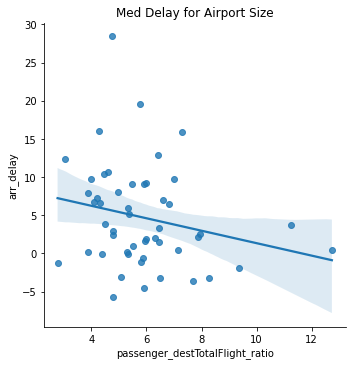

In [358]:
#SCALE BEFORE PLOT?
ax =sns.lmplot(x='passenger_destTotalFlight_ratio', y='arr_delay', data = airport_count_pass_delay_top)
ax.set(title='Med Delay for Airport Size')
plt.show()

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:
# This does make sense if aircraft go faster to make up time in air

#### Extra Task: Cities 

In [389]:
# CALCULATE FLIGHT COUNTS CITY  - run Task 6 first to split out city columns

# GET CITY AND FLIGHTS
city_count_orig = df[['origin_city', 'mkt_carrier']].groupby('origin_city', as_index=False).count().sort_values(by='mkt_carrier')
city_count_dest = df[['dest_city', 'mkt_carrier']].groupby('dest_city', as_index=False).count().sort_values(by='mkt_carrier')
city_count= city_count_orig.merge(city_count_dest, left_on='origin_city', right_on='dest_city')

city_count['total_flights'] = city_count['mkt_carrier_x']+city_count['mkt_carrier_y']
city_count.rename(columns = {'origin_city': 'city'}, inplace=True)
city_count.drop(['mkt_carrier_x', 'dest_city', 'mkt_carrier_y'], axis=1, inplace=True)

city_count= city_count.sort_values(by='total_flights', ascending=False)
city_count

,city,total_flights
235,Chicago,553
234,Atlanta,472
233,New York,382
231,Dallas/Fort Worth,372
232,Denver,351
...,...,...
25,Twin Falls,2
26,Toledo,2
31,Rock Springs,2
28,Texarkana,2


In [392]:
# GET TO CITIES FOR ML
top10cities = city_count.city.head(10)
keys = top10cities 
values = range(10,0,-1)
data = dict(zip(keys, values))
data

{'Chicago': 10,
 'Atlanta': 9,
 'New York': 8,
 'Dallas/Fort Worth': 7,
 'Denver': 6,
 'Charlotte': 5,
 'Houston': 4,
 'Washington': 3,
 'Los Angeles': 2,
 'Seattle': 1}

In [159]:
# GET CITY AND DELAYS
city_delay_dest_med = df[['dest_city', 'arr_delay']].groupby('dest_city', as_index=False).median().sort_values(by='arr_delay')
city_delay_dest_mean = df[['dest_city', 'arr_delay']].groupby('dest_city', as_index=False).mean().sort_values(by='arr_delay')

city_delay_dest_mean

,dest_city,arr_delay
116,La Crosse,-35.000000
90,Hays,-29.000000
0,Aberdeen,-26.000000
63,Elmira/Corning,-26.000000
124,Lihue,-25.333333
...,...,...
86,Harlingen/San Benito,55.500000
68,Fayetteville,56.933333
219,Trenton,64.333333
169,Peoria,72.000000


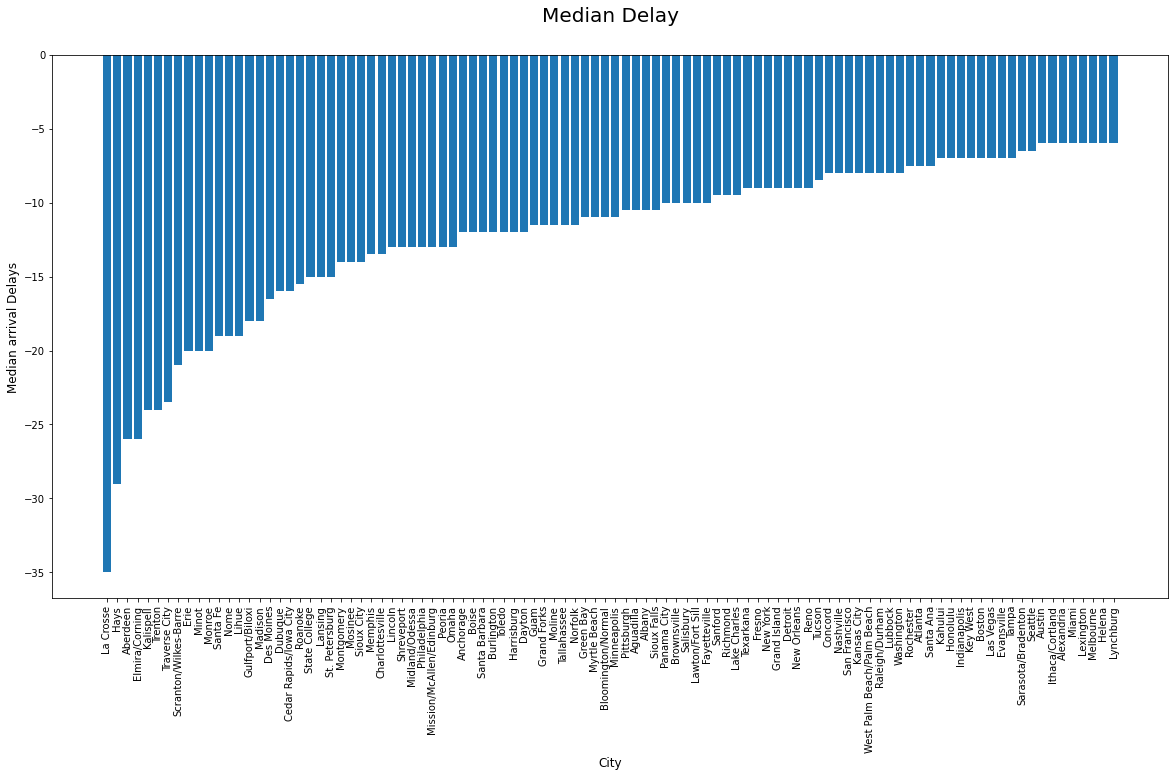

In [165]:
# PLOT CITY /delay (least med)
most_city_delays= city_delay_dest_med.head(100)
import matplotlib.pyplot as plt

x = most_city_delays.dest_city
y = most_city_delays.arr_delay

fig, ax = plt.subplots( figsize = (20,10))

ax.bar(x,y)
ax.set_ylabel('Median arrival Delays', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Median Delay', fontsize=20, y=1.05)
plt.xticks(rotation = 90)
plt.show()



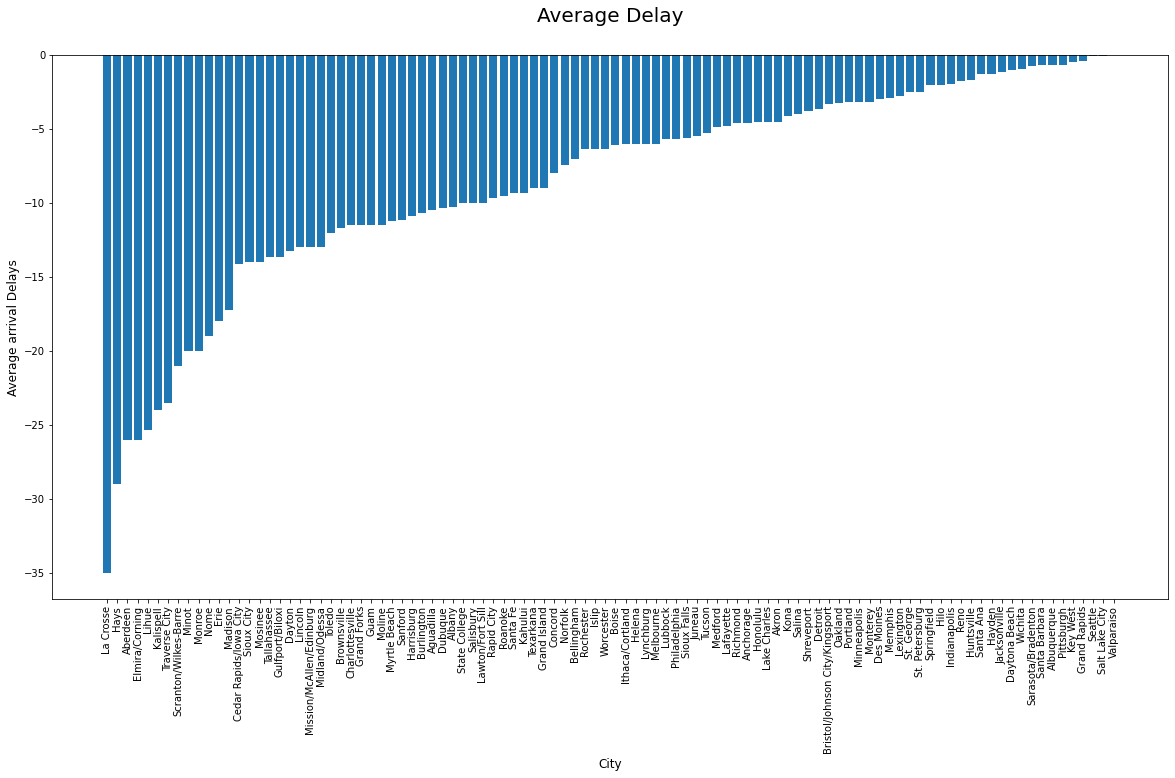

In [169]:
# PLOT CITY /delay (least mean)
city_delays= city_delay_dest_mean.head(100)
import matplotlib.pyplot as plt

x = city_delays.dest_city
y = city_delays.arr_delay

fig, ax = plt.subplots( figsize = (20,10))

ax.bar(x,y)
ax.set_ylabel('Average arrival Delays', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Average Delay', fontsize=20, y=1.05)
plt.xticks(rotation = 90)
plt.show()

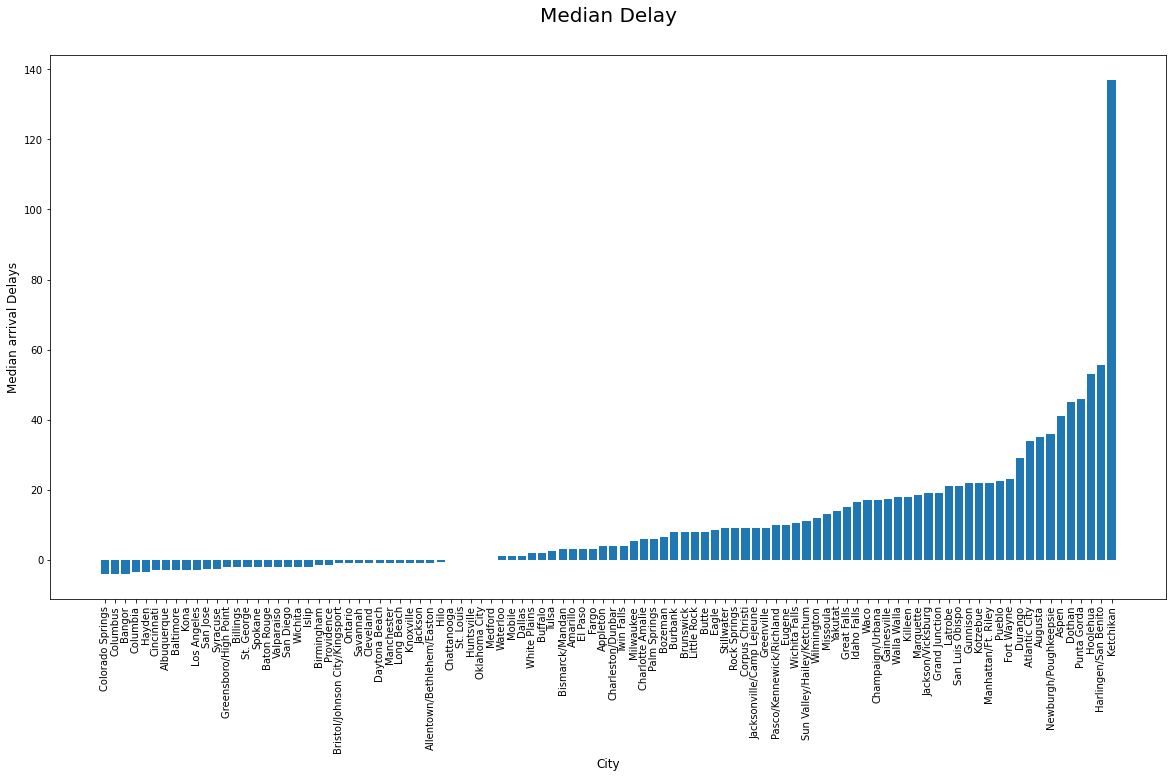

In [170]:
# PLOT CITY /delay (most med)
city_delays= city_delay_dest_med.tail(100)
import matplotlib.pyplot as plt

x = city_delays.dest_city
y = city_delays.arr_delay

fig, ax = plt.subplots( figsize = (20,10))

ax.bar(x,y)
ax.set_ylabel('Median arrival Delays', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Median Delay', fontsize=20, y=1.05)
plt.xticks(rotation = 90)
plt.show()

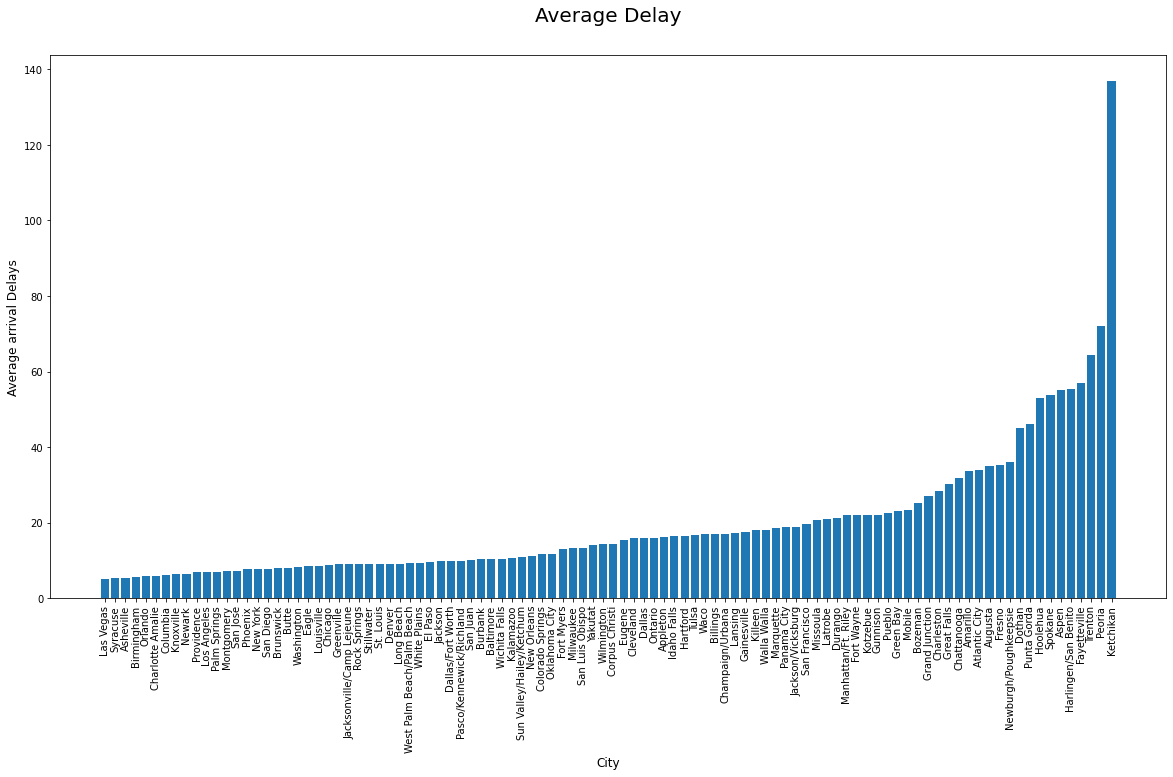

In [171]:
# PLOT CITY /delay (most avg)
city_delays= city_delay_dest_mean.tail(100)
import matplotlib.pyplot as plt

x = city_delays.dest_city
y = city_delays.arr_delay

fig, ax = plt.subplots( figsize = (20,10))

ax.bar(x,y)
ax.set_ylabel('Average arrival Delays', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Average Delay', fontsize=20, y=1.05)
plt.xticks(rotation = 90)
plt.show()